**Klasik Olivetti faces veri seti 400 gri tonlamalı 64 × 64 piksel yüz görüntüsü içerir. Elimizde her biri 10 kez fotoğraflanmış 40 farklı kişi vardır. Bu 40 farklı kişinin her birini birbirinden ayırabileceğimiz bir model geliştirmek istiyoruz.**

In [177]:
#Veri setinin import edelim
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

In [178]:
olivetti.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [179]:
# data, her fotoğraftaki 64*64= 4096 piksel olan görsellerin her pikselinin degerini tek boyutlu bir vektor olarak icerir
# target, kişilerin doğru sınıflandırılmış degerlerini içerir:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [180]:
#Bagımlı degiskenleri y'ye bagımsız degiskenleri X'e atayalım.
X, y = olivetti["data"], olivetti["target"]
X.shape

(400, 4096)

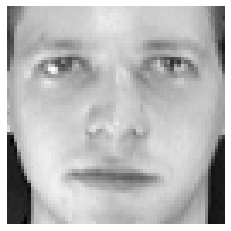

In [181]:
#1. görsel, görüntüleyelim
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(64, 64)
plt.imshow(some_digit_image, cmap="gray")
plt.axis("off")
plt.show()

### Look at images:

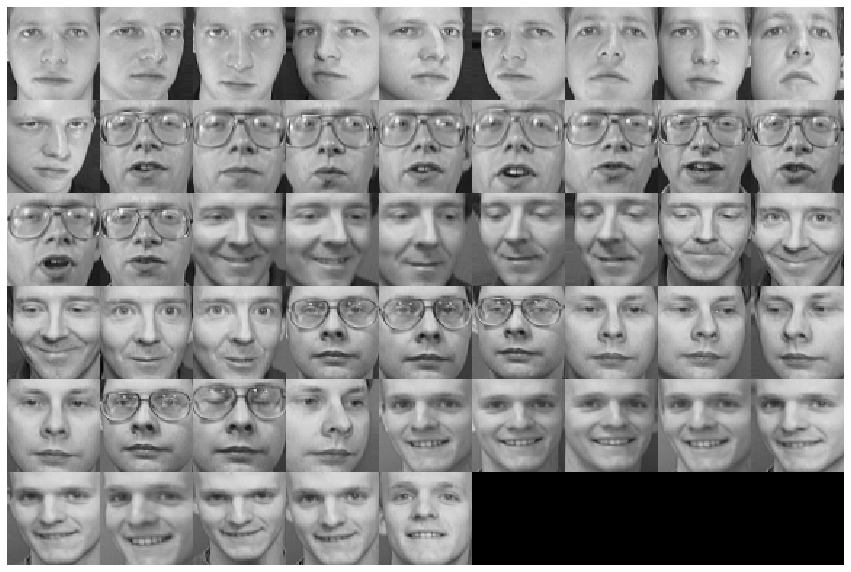

In [364]:
#ilk elli göseli görüntüleyelim. 
import numpy as np 
def plot_faces(instances, images_per_row=10, **options):
    size = 64
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = "gray", **options)
    plt.axis("off")
plt.figure(figsize=(15,15))
example_images = X[:50]
plot_faces(example_images, images_per_row=9)
plt.show()

**->** Resimleri incelerseniz, bazı görsellerde, aynı kisilerin olduğunu fark edebilirsiniz.

Şimdi hedefimiz, verisetindeki bu görselleri(kişileri) dogru sayıda kümeye ayırmak (doğru sayı 10 olacaktır çünkü 10 farklı insan var :d ama gerçek hayatta büyük ihtimalle böyle bir bilgiye sahip olmayacağız. Bu bilgiye sahip değiliz gibi devam edelim.)

Train ve test seti olarak bölelim. Zaten kücük bir veriseti olduğundan (400 örnek), train ve testte her sınıftan eşit oranda bulunması için **StratifiedShuffleSplit** i kullanacağız.

In [183]:
#uyari almamak icin.
from warnings import filterwarnings
filterwarnings('ignore') 

In [202]:

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=0)
train_valid_idx, test_idx = next(sss.split(X,y))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)
#X_train=X
#y_train=y

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


Simdi, görüntü kümeleme işlemlerinde, görüntülerin belirli kısımlarının her görüntüde aynı olması sebebiyle 
verinin boyutunu azaltmak eğitimi hızlandımrak için önemlidir ve genelde pek bir bilgi kaybı olmadan halledilir

PCA kullanarak bunu yapalım:

In [185]:
from sklearn.decomposition import PCA
pca=PCA(0.99) # 0.99= varyansın %99 unu açıklayacak kadar özelliği al demek. 
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

In [186]:
X_train_pca[0].shape

(200,)

In [187]:
sum(pca.explained_variance_ratio_[:200])

0.9901483394060051

In [188]:
len(X_train[0])

4096

Şimdi K-Means algoritması kullanarak verimizi kümelere ayıracağız. Ama öncesinde optimum k degerini bulmalıyız:

In [208]:
from sklearn.cluster import KMeans
k_range=range(30, 150, 8)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=30
k=38
k=46
k=54
k=62
k=70
k=78
k=86
k=94
k=102
k=110
k=118
k=126
k=134
k=142


Optimum k değerini bulmak için **silhouette_score**'u' kullanalım:

In [190]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

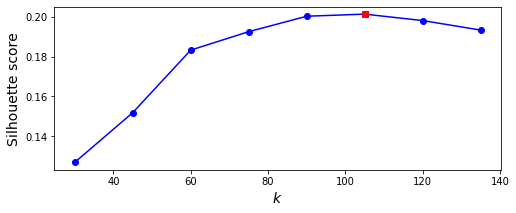

In [191]:
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [192]:
best_k

105

112 nin optimum kume sayısı olduğunu bulduk. bu durumda 107-117 arasındaki degerleri bir daha tarayabiliriz. Çünkü o degerlere bakmadık. Şu an bunu yapmayacağız.Açıkçası ben, ideal küme sayısının 40 olacağını düşünmüştüm, ama anı insanlarn farklı görselleri olabilir.

In [193]:
best_model = kmeans_per_k[best_index]

In [194]:
best_model.labels_

array([ 39,  75,  15,  65,  13,  12,  33,  88,   5,  87,  43,  37,  34,
        70,  80,  56,  14,  17,  54,  87,  48,  78,   3,  23,  43,  25,
        17,  19,  68,  20,  84,  13,  21,  20,   2,  35,  39,  56,  14,
        81,  37,   0,  15,   9,  54,  15,  75,  14,  26,  26,  18,  35,
        48,  19,  43,  19,  34,  24,  68,  31,  72,  77,  50,  45,  61,
        84,  23,  22,  21,  30,  66, 100,  22,  57,  99,  92,  71,  30,
         2,  29,  82,  53,  24,  88,  75,  50,  20,  46,  40,   1,  93,
        19,  13,  28,  89,  45,  49,  62,  19,   2,  49,  44,  32,  58,
        75,  60,  21,  53,   3,  95,  20,  65,  29,  66,  21,  13,  21,
         4,  49,  76,   2,  15,  94,  80,  93,   9,  58,  46,  77, 103,
         3,  42,  20,  43,   8,  97,  20,   2,  83,  44,  28,  33,   6,
        53,  18,  83,  90,  76,  59,  43,  36,  14,  63,  21,  51,  17,
        64,  54,  52,  99,  98,  78,  73,  76,  18,  55,  52,  69,  26,
        26,  14,   5,  54,  25,  69,  89,  73,  40,  78,  24,   

Cluster 0


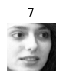

Cluster 1


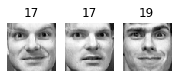

Cluster 2


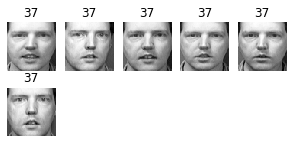

Cluster 3


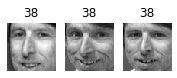

Cluster 4


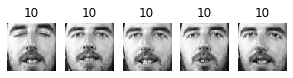

Cluster 5


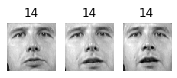

Cluster 6


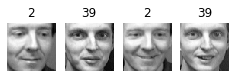

Cluster 7


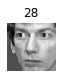

Cluster 8


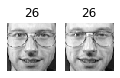

Cluster 9


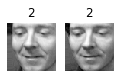

Cluster 10


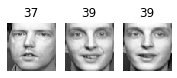

Cluster 11


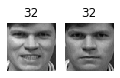

Cluster 12


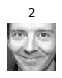

Cluster 13


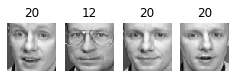

Cluster 14


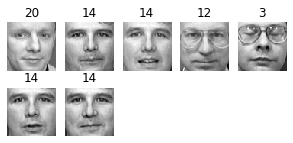

Cluster 15


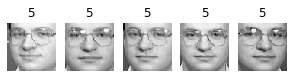

Cluster 16


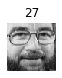

Cluster 17


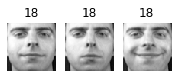

Cluster 18


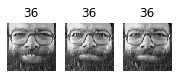

Cluster 19


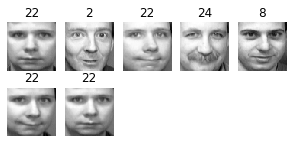

Cluster 20


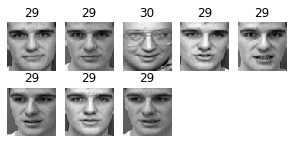

Cluster 21


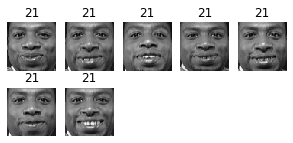

Cluster 22


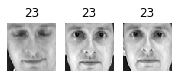

Cluster 23


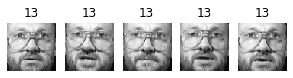

Cluster 24


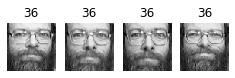

Cluster 25


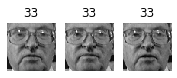

Cluster 26


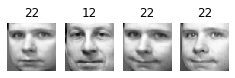

Cluster 27


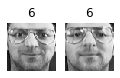

Cluster 28


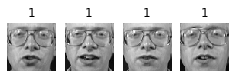

Cluster 29


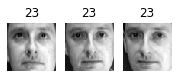

Cluster 30


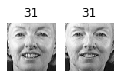

Cluster 31


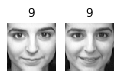

Cluster 32


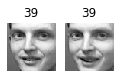

Cluster 33


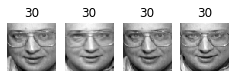

Cluster 34


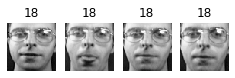

Cluster 35


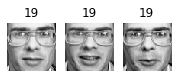

Cluster 36


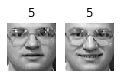

Cluster 37


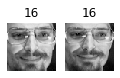

Cluster 38


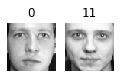

Cluster 39


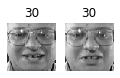

Cluster 40


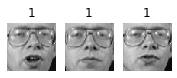

Cluster 41


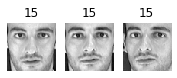

Cluster 42


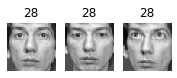

Cluster 43


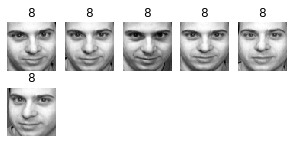

Cluster 44


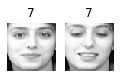

Cluster 45


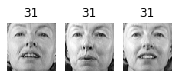

Cluster 46


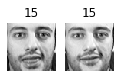

Cluster 47


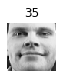

Cluster 48


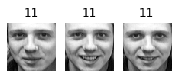

Cluster 49


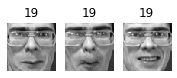

Cluster 50


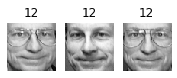

Cluster 51


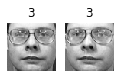

Cluster 52


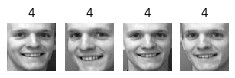

Cluster 53


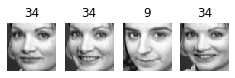

Cluster 54


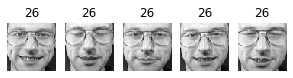

Cluster 55


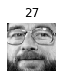

Cluster 56


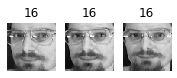

Cluster 57


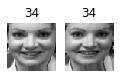

Cluster 58


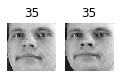

Cluster 59


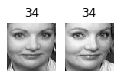

Cluster 60


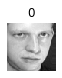

Cluster 61


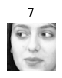

Cluster 62


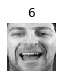

Cluster 63


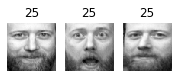

Cluster 64


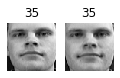

Cluster 65


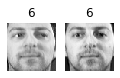

Cluster 66


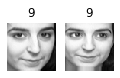

Cluster 67


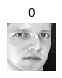

Cluster 68


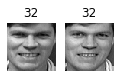

Cluster 69


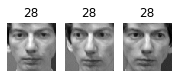

Cluster 70


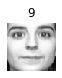

Cluster 71


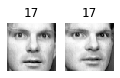

Cluster 72


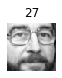

Cluster 73


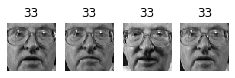

Cluster 74


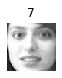

Cluster 75


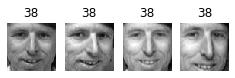

Cluster 76


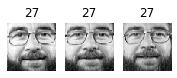

Cluster 77


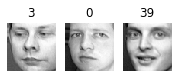

Cluster 78


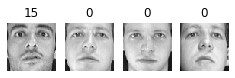

Cluster 79


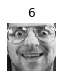

Cluster 80


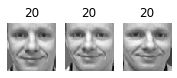

Cluster 81


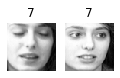

Cluster 82


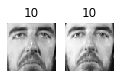

Cluster 83


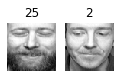

Cluster 84


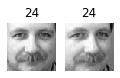

Cluster 85


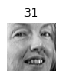

Cluster 86


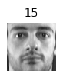

Cluster 87


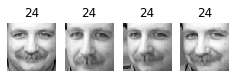

Cluster 88


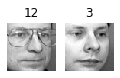

Cluster 89


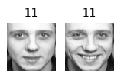

Cluster 90


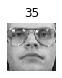

Cluster 91


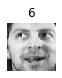

Cluster 92


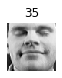

Cluster 93


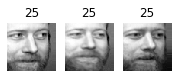

Cluster 94


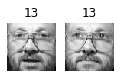

Cluster 95


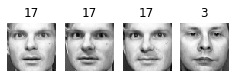

Cluster 96


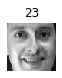

Cluster 97


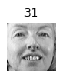

Cluster 98


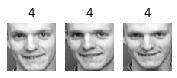

Cluster 99


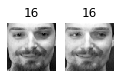

Cluster 100


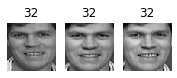

Cluster 101


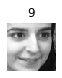

Cluster 102


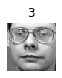

Cluster 103


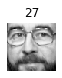

Cluster 104


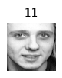

In [195]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)
    


Görüldüğü gibi, benzer görseller aynı kümede yer alıyor. Ancak bu kümelerin 1/3'ünde yabancı birisisnin yüzü yer alıyor! Bu ayrıntılara dikkat etmek gerekir. 

## 11. Using Clustering as Preprocessing for Classification

#### Şimdi resimlerdeki kişileri tahmin edecek bir sınıflandırma modeli kuralım. Sonra k-means ile boyut indirgeyip modeli tekrar kuralım.

Model olarak random ForrestI kullanacağız

In [196]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca,y_train)
clf.score(X_valid_pca,y_valid)

0.9125

;Şimdi k-Mens kullanarak boyutu indirgeyelim ve modeli indirgenmiş veriseti ile tekkrar eğitelim.

In [203]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_valid)

0.875

0.87 basarı oranımız oldu. Bunu artırabilir miyiz diye bir bakalım, olası küme sayılarını denyerek:

In [198]:
X_train.shape

(280, 4096)

In [199]:
X_train_pca.shape

(280, 200)

In [204]:
X_train_reduced.shape

(280, 105)

In [207]:
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

30 0.75
45 0.8875
60 0.875
75 0.8625
90 0.875
105 0.875
120 0.8625
135 0.875


küme sayısını 45 yapmayı deneyebiliriz gibi duruyor. 

In [219]:
model = KMeans(n_clusters=45, random_state=42).fit(X_train_pca)
X_train_reduced = model.transform(X_train_pca)
X_valid_reduced = model.transform(X_valid_pca)
X_test_reduced = model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_valid)

0.8875

Biraz daha iyi. 

peki, hiç pca bulaştırmadan direkt x train'i indirgeseydik? 


In [229]:
model = KMeans(n_clusters=100, random_state=42).fit(X_train)
X_reduced=model.transform(X_train)

In [230]:
X_reduced.shape

(280, 100)

In [231]:
X_train_reduced = model.transform(X_train)
X_valid_reduced = model.transform(X_valid)
X_test_reduced = model.transform(X_test)

In [232]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [233]:
clf.score(X_valid_reduced, y_valid)

0.85

Skor düştü. Tüm özellikleri almamıza rağmen skorun daha düşük olması şaşırtıcı olabilir. Ama bazen, gereksiz özelliklerin fazlalığı sürenin yanında başarılı model eğitmeye de engel olabilir. 

## 12. A Gaussian Mixture Model for the Olivetti Faces Dataset

bu bölümde hedef, modeli eğitip, yeni, aykırı yüzler (outliers, örneğin sağa sola çevirilmiş ya da değiştirilmiş görseller) yaratıp bunları tespit etmeye çalışmak olsun.

yine lgoritmamızı hızlandımak için PCA ile boyutu indirgemeliyiz. Daha önce bunu yaptık. | **" X_train_pca "**

Ve **inverse_transform()** metodunu kullanmak aykırı değer tespiti için mantıklı olackatır. Çünkü, 
    
    aykırı bir degeri yeniden yapılandırdığımızda, normal değerden çok daha büyük bir hata ile karşılaşırız. Bunu kullanbiliriz.

In [238]:
from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=40, random_state=42)
y_pred=gm.fit_predict(X_train_pca)

Asagidaki kodda gm.sample(metodu) rasgele eğitilen modelden örnekler oluşturur. Oluşturulan örneklerin özellikleri indirgenmiş bağımsız değişken vektörü olduğundan bu yeni özelliklere inverse transform işlemi uygulanabilir ve ardından .

In [ ]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)
y_gen_faces

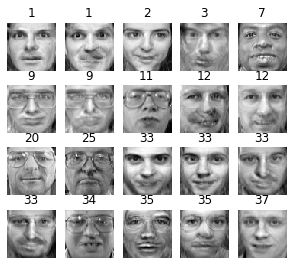

In [320]:
plot_faces(gen_faces[:20],y_gen_faces)

In [327]:
gm.score_samples(gen_faces_reduced[:20])

array([1033.6767278 , 1035.56129342, 1041.90717499, 1031.18368717,
       1056.8032467 ,  977.94902137,  983.91825178, 1070.56631963,
       1010.30256285, 1000.64637209, 1056.60991467, 1057.8663809 ,
       1008.38515693, 1022.09995101,  995.32175029, 1011.36065324,
       1071.69466645,  958.39902105,  985.27712037,  991.61491444])

Şimdi bazı görüntüleri ters, sağa solaçevirelim ve tekrar bakalım.

In [ ]:
gen

In [331]:
rotated

array([[0.61157024, 0.6404959 , 0.6487603 , ..., 0.6198347 , 0.6818182 ,
        0.6694215 ],
       [0.30578512, 0.338843  , 0.32231405, ..., 0.28099173, 0.4090909 ,
        0.45041323],
       [0.25619835, 0.26859504, 0.28099173, ..., 0.6859504 , 0.6983471 ,
        0.6983471 ],
       [0.24380165, 0.27272728, 0.338843  , ..., 0.2644628 , 0.26859504,
        0.24793388]], dtype=float32)

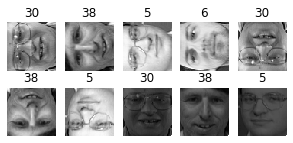

In [348]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [349]:
X_bad_faces_pca = pca.transform(X_bad_faces)
gm.score_samples(X_bad_faces_pca)

array([-20870615.80686616, -26359302.74681623, -52776424.73357642,
       -30676349.251922  , -34377514.63029988, -23522057.225648  ,
       -30474106.20784841, -63172792.8709823 , -73469871.25209503,
       -47178403.32453495])

In [350]:
gm.score_samples(X_train_pca[:10])

array([1184.41903797, 1125.07638219, 1161.70840276, 1143.93918717,
       1089.40368391, 1103.13043429, 1089.40374983, 1093.68368087,
       1169.28790188, 1093.68368318])

In [ ]:
goruldugu gibi değiştirdiğimiz ve bozduğumuz yüzlerin skorları oldukça kötü.

## 13. Anomali Tespiti için Boyut Küçültme Tekniklerini Kullanma

Şimdi skorlardaki bu farkı kullanara kanomali tespiti yapabiliriz. 

In [356]:
def reconstruction_errors(pca, X):
    X_pca=pca.transform(X)
    X_reconstructed=pca.inverse_transform(X_pca)
    mse=np.square(X_reconstructed-X).mean()
    return mse
print("normal hata:{}", reconstruction_errors(pca, X_train))
print("mad face hata hata:{}", reconstruction_errors(pca, X_bad_faces))

normal hata:{} 0.00018872954
mad face hata hata:{} 0.0048362664


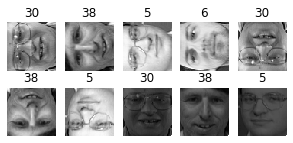

In [357]:
plot_faces(X_bad_faces, y_bad)

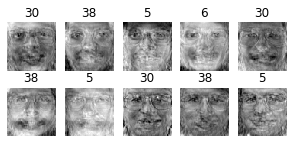

In [358]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)

bozuk görüntüleri tekrar dönüştürdüğünüzde (inverse transform) böyle bozuk görüntüler elde edersiniz. Fakat bozuk olmayan normal görüntülerde, aşağıdaki gibi bir dönüşüm olur. neredeyse farksız!

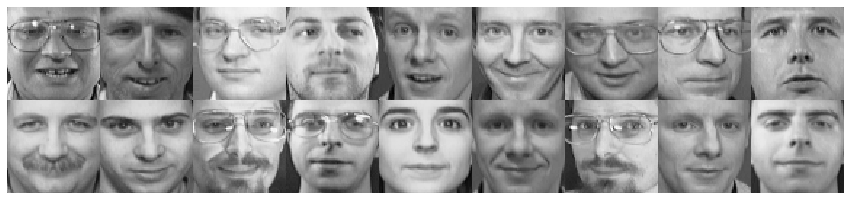

In [371]:
plt.figure(figsize=(15,15))
example_images = X_train[:18]
plot_faces(example_images, images_per_row=9)
plt.show()

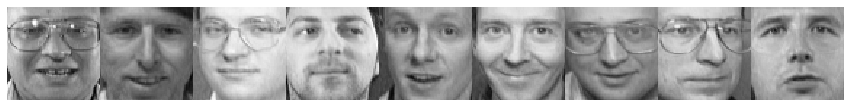

In [417]:
def show_(percent):
    pca_=PCA(percent/100).fit(X)
    reduced_X_train=pca_.transform(X_train[:50])
    reduced_X_train_reconstructed=pca_.inverse_transform(reduced_X_train)
    plt.figure(figsize=(15,15))
    example_images = reduced_X_train_reconstructed[:9]
    plot_faces(example_images, images_per_row=9)
    plt.show()
show_(99)

Bu arada, Pca ile bilgi kaybının yüzdesini artırınca ne olacağını eğlenmek için bir görelim :d

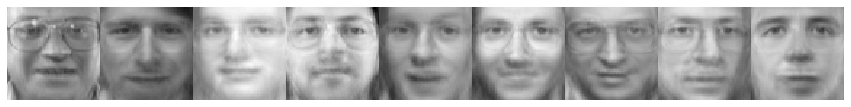

In [420]:
show_(85)

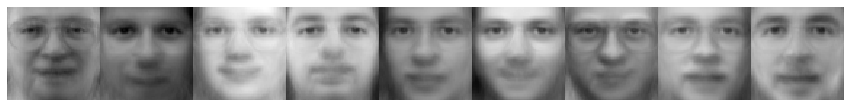

In [421]:
show_(65)

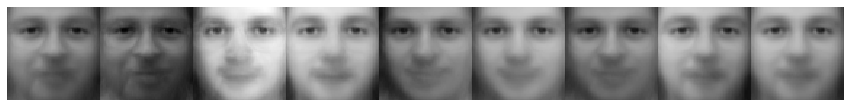

In [422]:
show_(30)